In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import tensorflow as tf
import keras


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import RMSprop,SGD,Adagrad,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
img_width,img_height=150,150
batch_size=32 #128,256
epochs=10

In [ ]:
path="/content/gdrive/My Drive/COLAB DATA/Soil_Dataset"

In [ ]:
train_dataset_dir="/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Train"
test_dataset_dir="/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test"

In [ ]:
from glob import glob
glob("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/*/")

['/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Clay_Soil/',
 '/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Alluvial_Soil/',
 '/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Red_Soil/',
 '/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Black_Soil/']

In [ ]:
labels=["Red_Soil",'Clay_Soil','Black_Soil','Alluvial_Soil']

In [ ]:
def show_soil(path):
  im=cv2.imread(path)
  im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)

  plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
  plt.show()

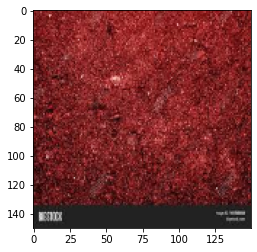

In [ ]:
show_soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Red_Soil/Red_35.jpg")

In [ ]:
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

testGen = ImageDataGenerator(rescale=1./255)

In [ ]:
train= trainGen.flow_from_directory(train_dataset_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)

test=testGen.flow_from_directory(test_dataset_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)



Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [ ]:
model= Sequential()
model.add(Conv2D(128,(3,3),input_shape=(img_height,img_width,3),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Flatten())
model.add(Dense(32,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)         

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15

In [ ]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/15
23/23 [==============================] - 156s 7s/step - loss: 1.2681 - accuracy: 0.3636 - val_loss: 0.9987 - val_accuracy: 0.4787
Epoch 2/15
23/23 [==============================] - 6s 239ms/step - loss: 0.9205 - accuracy: 0.5944 - val_loss: 0.8150 - val_accuracy: 0.6277
Epoch 3/15
23/23 [==============================] - 5s 238ms/step - loss: 0.7878 - accuracy: 0.6979 - val_loss: 0.9391 - val_accuracy: 0.6915
Epoch 4/15
23/23 [==============================] - 5s 237ms/step - loss: 0.6384 - accuracy: 0.7762 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 5/15
23/23 [==============================] - 6s 239ms/step - loss: 0.4075 - accuracy: 0.8322 - val_loss: 0.4961 - val_accuracy: 0.7447
Epoch 6/15
23/23 [==============================] - 6s 239ms/step - loss: 0.3612 - accuracy: 0.8490 - val_loss: 0.4607 - val_accuracy: 0.7872
Epoch 7/15
23/23 [==============================] - 5s 238ms/step - loss: 0.3302 - accuracy: 0.8797 - val_loss: 0.4652 - val_accuracy: 0.7713
Epoch 8

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss=model.history.history['loss']
train_loss

[1.2680662870407104,
 0.9205458760261536,
 0.7877799272537231,
 0.638370156288147,
 0.4075470268726349,
 0.3612271845340729,
 0.3302469253540039,
 0.3146982789039612,
 0.37021496891975403,
 0.29933491349220276,
 0.31800028681755066,
 0.24356381595134735,
 0.24393944442272186,
 0.2777045965194702,
 0.2292076051235199]

In [ ]:
train_acc=model.history.history['accuracy']
train_acc

[0.3636363744735718,
 0.5944055914878845,
 0.6979020833969116,
 0.7762237787246704,
 0.8321678042411804,
 0.8489510416984558,
 0.8797202706336975,
 0.8657342791557312,
 0.8377622365951538,
 0.8797202706336975,
 0.8797202706336975,
 0.8993006944656372,
 0.9020978808403015,
 0.9048951268196106,
 0.9104894995689392]

In [ ]:
test_loss=model.history.history['val_loss']
test_loss

[0.9987246990203857,
 0.8149517178535461,
 0.9390624165534973,
 0.5505678057670593,
 0.49607908725738525,
 0.46066832542419434,
 0.4652136266231537,
 0.5653600692749023,
 0.45601701736450195,
 0.5923859477043152,
 0.4158460199832916,
 0.3624444603919983,
 0.5699556469917297,
 0.3244722783565521,
 0.32926514744758606]

In [ ]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.478723406791687,
 0.6276595592498779,
 0.6914893388748169,
 0.75,
 0.7446808218955994,
 0.7872340679168701,
 0.771276593208313,
 0.8031914830207825,
 0.7340425252914429,
 0.7340425252914429,
 0.835106372833252,
 0.8244680762290955,
 0.8191489577293396,
 0.8563829660415649,
 0.8989361524581909]

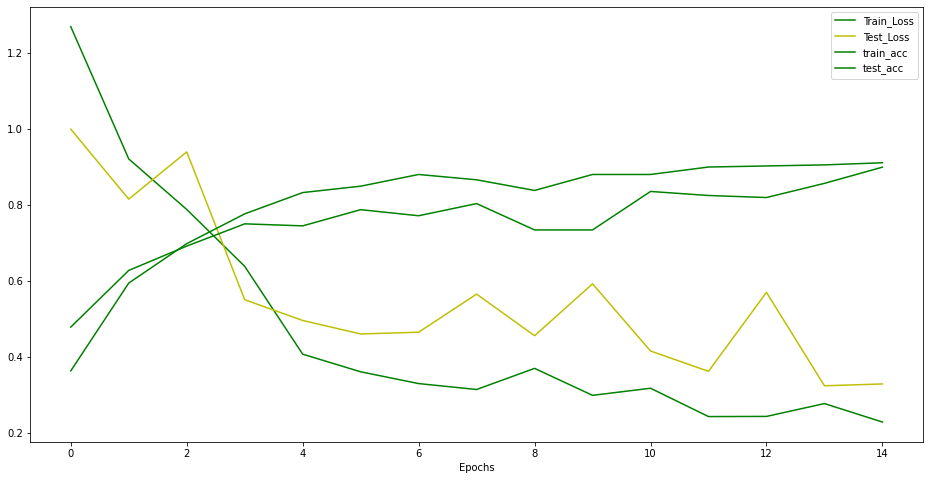

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(epochs),train_loss,color='g',label='Train_Loss')
plt.plot(np.arange(epochs),test_loss,color='y',label='Test_Loss')
plt.plot(np.arange(epochs),train_acc,color='g',label='train_acc')
plt.plot(np.arange(epochs),test_acc,color='g',label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [ ]:
loss,acc=model.evaluate(test)
print("Test Loss:",loss)
print("Test Acc:",acc)

6/6 [==============================] - 0s 80ms/step - loss: 0.3293 - accuracy: 0.8989
Test Loss: 0.32926517724990845
Test Acc: 0.8989361524581909


In [ ]:
labels

['Red_Soil', 'Clay_Soil', 'Black_Soil', 'Alluvial_Soil']

In [ ]:
def Predict_Soil(path):
  im=cv2.imread(path)
  im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)

  plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
  plt.show()

  img_pred=image.load_img(path,target_size=(img_height,img_width))
  img_pred=image.img_to_array(img_pred)
  imag=np.expand_dims(img_pred,axis=0)
  result=model.predict_classes(imag)
  prob=model.predict_proba(imag)
  print('Predicted Class:',result)
  print('Probability:{}'.format(prob[0]))
  if result[0]==0:
    prediction="Red_Soil"
  elif result[0]==1:
    prediction="Clay_Soil"
  elif result[0]==2:
    prediction="Black_Soil"
  else:
    prediction="Alluvial_Soil"
  print("Predicted Class:",prediction)

In [ ]:
from keras.preprocessing import image

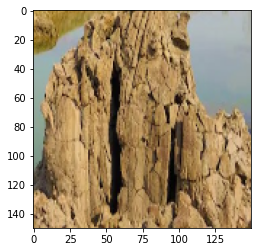

Predicted Class: [3]
Probability:[0. 0. 0. 1.]
Predicted Class: Alluvial_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Alluvial_Soil/Alluvial_11.jpg")

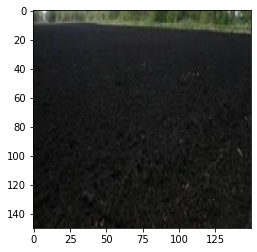

Predicted Class: [1]
Probability:[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.9002357e-10]
Predicted Class: Clay_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Black_Soil/Black_47.jpg")

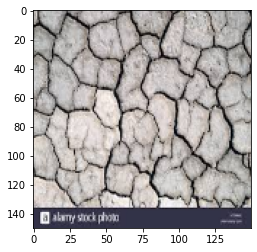

Predicted Class: [1]
Probability:[0. 1. 0. 0.]
Predicted Class: Clay_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Clay_Soil/Clay_34.jpg")

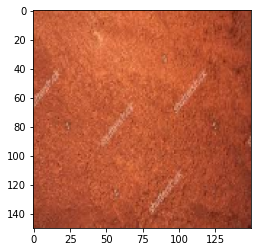

Predicted Class: [0]
Probability:[1. 0. 0. 0.]
Predicted Class: Red_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Red_Soil/Red_14.jpg")

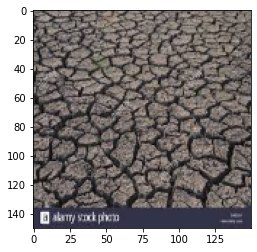

Predicted Class: [1]
Probability:[0. 1. 0. 0.]
Predicted Class: Clay_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Clay_Soil/Clay_12.jpg")

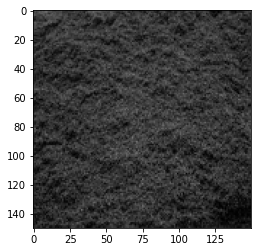

Predicted Class: [1]
Probability:[0. 1. 0. 0.]
Predicted Class: Clay_Soil


In [ ]:
Predict_Soil("/content/gdrive/My Drive/COLAB DATA/Soil_Dataset/Test/Black_Soil/Black_1.jpg")